In [1]:
import os
from pathlib import Path
os.chdir("/Users/mregan/Dev/Litmus-freqtrade-temp/")
print(Path.cwd())

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%load_ext autoreload
%autoreload 2

/Users/mregan/Dev/Litmus-freqtrade-temp


In [2]:
import pandas as pd
import numpy as np
from user_data.litmus import get_labeled_data
from user_data.litmus import meta_model

pd.options.display.max_columns = 400
pd.options.display.max_rows = 400

In [3]:
ld = get_labeled_data.GetLabeledData(
    timeframe='12h',
    latest=False,
    bt_filename='backtest_vulcanprimary-2022-05-06_20-59-18.json',
    bt_pkl_filename='backtest_vulcanprimary-2022-05-06_20-59-18_signals.pkl')

In [4]:
ld.get_trade_outcomes()

stake_amount     amount  \
strategy      pair       date                                                 
VulcanPrimary 1INCH/USDT 2021-03-08 12:00:00+00:00         100.0  23.121922   
                         2021-03-17 00:00:00+00:00         100.0  22.331398   
                         2021-04-04 12:00:00+00:00         100.0  21.881838   
                         2021-04-13 12:00:00+00:00         100.0  17.820230   
                         2021-04-30 12:00:00+00:00         100.0  17.733955   
                         2021-05-05 00:00:00+00:00         100.0  17.477934   
                         2021-05-11 12:00:00+00:00         100.0  15.305029   
                         2021-06-03 00:00:00+00:00         100.0  29.014943   
                         2021-06-04 12:00:00+00:00         100.0  29.619976   
                         2021-06-15 00:00:00+00:00         100.0  27.763125   
                         2021-07-07 00:00:00+00:00         100.0  35.076642   
                         2021-07-28 00:00:00+00:00         100.0  44.893378   
                         2021-08-04 00:00:00+00:00         100.0  44.464206   
                         2021-08-19 00:00:00+00:00         100.0  31.460391   
                         2021-08-23 00:00:00+00:00         100.0  29.041907   
                         2021-09-04 12:00:00+00:00         100.0  27.159153   
                         2021-10-02 12:00:00+00:00         100.0  32.840722   
                         2021-10-14 12:00:00+00:00         100.0  29.761905   
                         2021-10-18 00:00:00+00:00         100.0  29.985007   
                         2021-10-25 00:00:00+00:00         100.0  25.113009   
                         2021-10-27 00:00:00+00:00         100.0  16.477179   
                         2021-12-24 00:00:00+00:00         100.0  35.701535   
                         2022-02-05 00:00:00+00:00         100.0  55.126792   
                         2022-02-15 12:00:00+00:00         100.0  55.617353   
                         2022-03-17 00:00:00+00:00         100.0  65.487885   
                         2022-04-01 12:00:00+00:00         100.0  53.050398   

                                                                   open_date  \
strategy      pair       date                                                  
VulcanPrimary 1INCH/USDT 2021-03-08 12:00:00+00:00 2021-03-09 00:00:00+00:00   
                         2021-03-17 00:00:00+00:00 2021-03-17 12:00:00+00:00   
                         2021-04-04 12:00:00+00:00 2021-04-05 00:00:00+00:00   
                         2021-04-13 12:00:00+00:00 2021-04-14 00:00:00+00:00   
                         2021-04-30 12:00:00+00:00 2021-05-01 00:00:00+00:00   
                         2021-05-05 00:00:00+00:00 2021-05-05 12:00:00+00:00   
                         2021-05-11 12:00:00+00:00 2021-05-12 00:00:00+00:00   
                         2021-06-03 00:00:00+00:00 2021-06-03 12:00:00+00:00   
                         2021-06-04 12:00:00+00:00 2021-06-05 00:00:00+00:00   
                         2021-06-15 00:00:00+00:00 2021-06-15 12:00:00+00:00   
                         2021-07-07 00:00:00+00:00 2021-07-07 12:00:00+00:00   
                         2021-07-28 00:00:00+00:00 2021-07-28 12:00:00+00:00   
                         2021-08-04 00:00:00+00:00 2021-08-04 12:00:00+00:00   
                         2021-08-19 00:00:00+00:00 2021-08-19 12:00:00+00:00   
                         2021-08-23 00:00:00+00:00 2021-08-23 12:00:00+00:00   
                         2021-09-04 12:00:00+00:00 2021-09-05 00:00:00+00:00   
                         2021-10-02 12:00:00+00:00 2021-10-03 00:00:00+00:00   
                         2021-10-14 12:00:00+00:00 2021-10-15 00:00:00+00:00   
                         2021-10-18 00:00:00+00:00 2021-10-18 12:00:00+00:00   
                         2021-10-25 00:00:00+00:00 2021-10-25 12:00:00+00:00   
                         2021-10-27 00:00:00+00:00 2021-10-27 12:00:00+00:00   

In [5]:
ld.get_signals()

open    high     low  \
strategy      pair       date                                                
VulcanPrimary 1INCH/USDT 2021-03-08 12:00:00+00:00  3.9949  4.4662  3.9887   
                         2021-03-17 00:00:00+00:00  4.5603  4.8100  4.2512   
                         2021-04-04 12:00:00+00:00  4.3702  4.7020  4.3340   
                         2021-04-13 12:00:00+00:00  5.4557  5.7313  5.4438   
                         2021-04-30 12:00:00+00:00  5.5725  5.6900  5.5086   
                         2021-05-05 00:00:00+00:00  5.2431  5.8699  5.1855   
                         2021-05-11 12:00:00+00:00  6.0650  6.5367  5.9131   
                         2021-06-03 00:00:00+00:00  3.3753  3.5957  3.3241   
                         2021-06-04 12:00:00+00:00  3.3527  3.7200  3.2820   
                         2021-06-15 00:00:00+00:00  3.6895  3.8005  3.5555   
                         2021-07-07 00:00:00+00:00  2.8363  2.9690  2.7747   
                         2021-07-28 00:00:00+00:00  2.2173  2.2498  2.1450   
                         2021-08-04 00:00:00+00:00  2.2232  2.2498  2.1886   
                         2021-08-19 00:00:00+00:00  3.1127  3.4095  3.0700   
                         2021-08-23 00:00:00+00:00  3.3861  3.4920  3.3602   
                         2021-09-04 12:00:00+00:00  3.5150  3.7770  3.5150   
                         2021-10-02 12:00:00+00:00  2.9060  3.1690  2.8910   
                         2021-10-14 12:00:00+00:00  3.3450  3.5050  3.3110   
                         2021-10-18 00:00:00+00:00  3.4830  3.6490  3.3120   
                         2021-10-25 00:00:00+00:00  3.8040  4.0100  3.7630   
                         2021-10-27 00:00:00+00:00  3.9490  7.7300  3.9130   
                         2021-12-24 00:00:00+00:00  2.8240  2.8900  2.7280   
                         2022-02-05 00:00:00+00:00  1.7640  1.8470  1.7510   
                         2022-02-15 12:00:00+00:00  1.7510  1.8020  1.7450   
                         2022-03-17 00:00:00+00:00  1.5090  1.5380  1.4600   
                         2022-04-01 12:00:00+00:00  1.7440  1.8900  1.7090   

                                                     close        volume  \
strategy      pair       date                                              
VulcanPrimary 1INCH/USDT 2021-03-08 12:00:00+00:00  4.3249  1.099790e+07   
                         2021-03-17 00:00:00+00:00  4.4766  1.071784e+07   
                         2021-04-04 12:00:00+00:00  4.5700  3.971927e+06   
                         2021-04-13 12:00:00+00:00  5.6116  4.272485e+06   
                         2021-04-30 12:00:00+00:00  5.6400  3.289967e+06   
                         2021-05-05 00:00:00+00:00  5.7234  5.622441e+06   
                         2021-05-11 12:00:00+00:00  6.5350  4.370547e+06   
                         2021-06-03 00:00:00+00:00  3.4438  5.712666e+06   
                         2021-06-04 12:00:00+00:00  3.3720  1.050582e+07   
                         2021-06-15 00:00:00+00:00  3.6013  4.356113e+06   
                         2021-07-07 00:00:00+00:00  2.8509  3.397599e+06   
                         2021-07-28 00:00:00+00:00  2.2268  3.219814e+06   
                         2021-08-04 00:00:00+00:00  2.2497  1.474483e+06   
                         2021-08-19 00:00:00+00:00  3.1785  1.017040e+07   
                         2021-08-23 00:00:00+00:00  3.4421  3.943703e+06   
                         2021-09-04 12:00:00+00:00  3.6820  8.669678e+06   
                         2021-10-02 12:00:00+00:00  3.0460  8.918168e+06   
                         2021-10-14 12:00:00+00:00  3.3590  1.259974e+07   
                         2021-10-18 00:00:00+00:00  3.3370  1.086975e+07   
                         2021-10-25 00:00:00+00:00  3.9840  3.671795e+06   
                         2021-10-27 00:00:00+00:00  6.0690  1.219176e+08   
                         2021-12-24 00:00:00+00:00  2.8010  7.390781e+06   
                         2022-02-05 00:00:00+

In [7]:
df = ld.get_all_data()
df

open    high     low  \
strategy      pair       date                                                
VulcanPrimary 1INCH/USDT 2021-03-08 12:00:00+00:00  3.9949  4.4662  3.9887   
                         2021-03-17 00:00:00+00:00  4.5603  4.8100  4.2512   
                         2021-04-04 12:00:00+00:00  4.3702  4.7020  4.3340   
                         2021-04-13 12:00:00+00:00  5.4557  5.7313  5.4438   
                         2021-04-30 12:00:00+00:00  5.5725  5.6900  5.5086   
                         2021-05-05 00:00:00+00:00  5.2431  5.8699  5.1855   
                         2021-05-11 12:00:00+00:00  6.0650  6.5367  5.9131   
                         2021-06-03 00:00:00+00:00  3.3753  3.5957  3.3241   
                         2021-06-04 12:00:00+00:00  3.3527  3.7200  3.2820   
                         2021-06-15 00:00:00+00:00  3.6895  3.8005  3.5555   
                         2021-07-07 00:00:00+00:00  2.8363  2.9690  2.7747   
                         2021-07-28 00:00:00+00:00  2.2173  2.2498  2.1450   
                         2021-08-04 00:00:00+00:00  2.2232  2.2498  2.1886   
                         2021-08-19 00:00:00+00:00  3.1127  3.4095  3.0700   
                         2021-08-23 00:00:00+00:00  3.3861  3.4920  3.3602   
                         2021-09-04 12:00:00+00:00  3.5150  3.7770  3.5150   
                         2021-10-02 12:00:00+00:00  2.9060  3.1690  2.8910   
                         2021-10-14 12:00:00+00:00  3.3450  3.5050  3.3110   
                         2021-10-18 00:00:00+00:00  3.4830  3.6490  3.3120   
                         2021-10-25 00:00:00+00:00  3.8040  4.0100  3.7630   
                         2021-10-27 00:00:00+00:00  3.9490  7.7300  3.9130   
                         2021-12-24 00:00:00+00:00  2.8240  2.8900  2.7280   
                         2022-02-05 00:00:00+00:00  1.7640  1.8470  1.7510   
                         2022-02-15 12:00:00+00:00  1.7510  1.8020  1.7450   
                         2022-03-17 00:00:00+00:00  1.5090  1.5380  1.4600   
                         2022-04-01 12:00:00+00:00  1.7440  1.8900  1.7090   

                                                     close        volume  \
strategy      pair       date                                              
VulcanPrimary 1INCH/USDT 2021-03-08 12:00:00+00:00  4.3249  1.099790e+07   
                         2021-03-17 00:00:00+00:00  4.4766  1.071784e+07   
                         2021-04-04 12:00:00+00:00  4.5700  3.971927e+06   
                         2021-04-13 12:00:00+00:00  5.6116  4.272485e+06   
                         2021-04-30 12:00:00+00:00  5.6400  3.289967e+06   
                         2021-05-05 00:00:00+00:00  5.7234  5.622441e+06   
                         2021-05-11 12:00:00+00:00  6.5350  4.370547e+06   
                         2021-06-03 00:00:00+00:00  3.4438  5.712666e+06   
                         2021-06-04 12:00:00+00:00  3.3720  1.050582e+07   
                         2021-06-15 00:00:00+00:00  3.6013  4.356113e+06   
                         2021-07-07 00:00:00+00:00  2.8509  3.397599e+06   
                         2021-07-28 00:00:00+00:00  2.2268  3.219814e+06   
                         2021-08-04 00:00:00+00:00  2.2497  1.474483e+06   
                         2021-08-19 00:00:00+00:00  3.1785  1.017040e+07   
                         2021-08-23 00:00:00+00:00  3.4421  3.943703e+06   
                         2021-09-04 12:00:00+00:00  3.6820  8.669678e+06   
                         2021-10-02 12:00:00+00:00  3.0460  8.918168e+06   
                         2021-10-14 12:00:00+00:00  3.3590  1.259974e+07   
                         2021-10-18 00:00:00+00:00  3.3370  1.086975e+07   
                         2021-10-25 00:00:00+00:00  3.9840  3.671795e+06   
                         2021-10-27 00:00:00+00:00  6.0690  1.219176e+08   
                         2021-12-24 00:00:00+00:00  2.8010  7.390781e+06   
                         2022-02-05 00:00:00+

In [10]:
df[['open_date', 'close_date', 'exit_reason', 'profit_ratio']]

open_date  \
strategy      pair       date                                                  
VulcanPrimary 1INCH/USDT 2021-03-08 12:00:00+00:00 2021-03-09 00:00:00+00:00   
                         2021-03-17 00:00:00+00:00 2021-03-17 12:00:00+00:00   
                         2021-04-04 12:00:00+00:00 2021-04-05 00:00:00+00:00   
                         2021-04-13 12:00:00+00:00 2021-04-14 00:00:00+00:00   
                         2021-04-30 12:00:00+00:00 2021-05-01 00:00:00+00:00   
                         2021-05-05 00:00:00+00:00 2021-05-05 12:00:00+00:00   
                         2021-05-11 12:00:00+00:00 2021-05-12 00:00:00+00:00   
                         2021-06-03 00:00:00+00:00 2021-06-03 12:00:00+00:00   
                         2021-06-04 12:00:00+00:00 2021-06-05 00:00:00+00:00   
                         2021-06-15 00:00:00+00:00 2021-06-15 12:00:00+00:00   
                         2021-07-07 00:00:00+00:00 2021-07-07 12:00:00+00:00   
                         2021-07-28 00:00:00+00:00 2021-07-28 12:00:00+00:00   
                         2021-08-04 00:00:00+00:00 2021-08-04 12:00:00+00:00   
                         2021-08-19 00:00:00+00:00 2021-08-19 12:00:00+00:00   
                         2021-08-23 00:00:00+00:00 2021-08-23 12:00:00+00:00   
                         2021-09-04 12:00:00+00:00 2021-09-05 00:00:00+00:00   
                         2021-10-02 12:00:00+00:00 2021-10-03 00:00:00+00:00   
                         2021-10-14 12:00:00+00:00 2021-10-15 00:00:00+00:00   
                         2021-10-18 00:00:00+00:00 2021-10-18 12:00:00+00:00   
                         2021-10-25 00:00:00+00:00 2021-10-25 12:00:00+00:00   
                         2021-10-27 00:00:00+00:00 2021-10-27 12:00:00+00:00   
                         2021-12-24 00:00:00+00:00 2021-12-24 12:00:00+00:00   
                         2022-02-05 00:00:00+00:00 2022-02-05 12:00:00+00:00   
                         2022-02-15 12:00:00+00:00 2022-02-16 00:00:00+00:00   
                         2022-03-17 00:00:00+00:00 2022-03-17 12:00:00+00:00   
                         2022-04-01 12:00:00+00:00 2022-04-02 00:00:00+00:00   

                                                                   close_date  \
strategy      pair       date                                                   
VulcanPrimary 1INCH/USDT 2021-03-08 12:00:00+00:00  2021-04-09 12:00:00+00:00   
                         2021-03-17 00:00:00+00:00  2021-04-27 12:00:00+00:00   
                         2021-04-04 12:00:00+00:00  2021-05-06 12:00:00+00:00   
                         2021-04-13 12:00:00+00:00  2021-04-24 12:00:00+00:00   
                         2021-04-30 12:00:00+00:00  2021-05-19 12:00:00+00:00   
                         2021-05-05 00:00:00+00:00  2021-05-19 12:00:00+00:00   
                         2021-05-11 12:00:00+00:00  2021-05-18 00:00:00+00:00   
                         2021-06-03 00:00:00+00:00  2021-06-22 12:00:00+00:00   
                         2021-06-04 12:00:00+00:00  2021-06-22 12:00:00+00:00   
                         2021-06-15 00:00:00+00:00  2021-06-22 00:00:00+00:00   
                         2021-07-07 00:00:00+00:00  2021-07-16 12:00:00+00:00   
                         2021-07-28 00:00:00+00:00  2021-08-20 00:00:00+00:00   
                         2021-08-04 00:00:00+00:00  2021-08-20 00:00:00+00:00   
                         2021-08-19 00:00:00+00:00  2021-09-22 00:00:00+00:00   
                         2021-08-23 00:00:00+00:00  2021-09-21 00:00:00+00:00   
                         2021-09-04 12:00:00+00:00  2021-09-20 12:00:00+00:00   
                         2021-10-02 12:00:00+00:00  2021-10-27 12:00:00+00:00   
                         2021-10-14 12:00:00+00:00  2021-10-27 12:00:00+00:00   
                         2021-10-18 00:00:00+00:00  2021-10-27 12:00:00+00:00   
                         2021-10-25 00:00:00+00:00  2021-10-27 12:00:00+00:00   
                         2021-10-27 00:00:00

In [12]:
import numpy as np
from fracdiff.sklearn import FracdiffStat

np.random.seed(42)
X = np.random.randn(100, 1).cumsum(0).cumsum(0)

f = FracdiffStat().fit(X)

print(f.d_)

RuntimeWarning: d_ has nan. You may want to increase `upper`.

In [15]:
import matplotlib.pyplot as plt

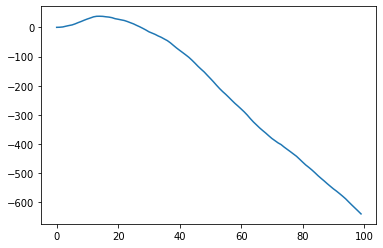

In [16]:
plt.plot(X)

In [19]:
cols = df.columns

In [28]:
import numpy as np
from fracdiff.sklearn import FracdiffStat

failed_cols = []

for c in cols:
    try:
        f = FracdiffStat().fit(df.loc[:, c].values.reshape(-1, 1))
    except:
        failed_cols.append(c)
    
print(failed_cols)

/Users/mregan/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/mregan/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/mregan/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/mregan/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/mregan/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by 

['volume', 'volume_fi', 'volume_vpt', 'volume_nvi', 'volatility_bbli', 'volatility_kcli', 'trend_vortex_ind_diff', 'trend_kst_diff', 'trend_stc', 'trend_adx_pos', 'momentum_rsi', 'momentum_stoch_rsi', 'momentum_roc', 'momentum_pvo', 'RSI', 'growing_SMA', 'shrinking_SMA', 'stoch_sell_cross', 'buy_trigger', 'sell_trigger', 'date_btc_12h', 'volume_adi_btc_12h', 'volume_cmf_btc_12h', 'volume_fi_btc_12h', 'volume_nvi_btc_12h', 'volatility_bbp_btc_12h', 'volatility_kcp_btc_12h', 'volatility_kchi_btc_12h', 'volatility_dcp_btc_12h', 'trend_vortex_ind_neg_btc_12h', 'trend_stc_btc_12h', 'trend_cci_btc_12h', 'trend_visual_ichimoku_a_btc_12h', 'trend_aroon_down_btc_12h', 'trend_psar_up_btc_12h', 'trend_psar_down_btc_12h', 'trend_psar_down_indicator_btc_12h', 'momentum_stoch_rsi_btc_12h', 'momentum_stoch_rsi_k_btc_12h', 'momentum_stoch_btc_12h', 'momentum_stoch_signal_btc_12h', 'momentum_wr_btc_12h', 'momentum_roc_btc_12h', 'date_spx_1d', 'volume_obv_spx_1d', 'volume_fi_spx_1d', 'volume_em_spx_1d',

/Users/mregan/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/mregan/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/mregan/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/mregan/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/mregan/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by 

In [29]:
len(cols)

770

In [30]:
len(failed_cols)

261